In [1]:
import nltk 


In [2]:
f= open("C:/Users/levent/OneDrive/Masaüstü/Doğal+Dil+İşleme+Kodlar/Hakan Cebeci - Doğal Dil İşleme/2- word2vec/hurriyet.txt",'r',encoding='utf8')

In [3]:
text=f.read()

In [4]:
sents=text.split('\n')
corpus=[]

In [5]:
for word in sents:
    corpus.append(word.split())

In [7]:
from gensim.models import Word2Vec


In [9]:
model= Word2Vec(corpus, vector_size=100, window=5, min_count=5, sg=1)

In [26]:
model.wv.most_similar('kitap')

[('kitabı', 0.7606695890426636),
 ('resim', 0.7228093147277832),
 ('belgesel', 0.7014545798301697),
 ('kitabın', 0.6828809380531311),
 ('romanı', 0.6798225045204163),
 ('film', 0.6782879829406738),
 ('şiir', 0.6780503988265991),
 ('albüm', 0.6763075590133667),
 ('belgeseller', 0.6756852865219116),
 ('sergisi', 0.673959493637085)]

In [27]:
model.save('word2vec.model')

In [39]:
model= Word2Vec.load('word2vec.model')

In [40]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [43]:
def closestwords_tsneplot(model, word):
    word_vectors = np.empty((0,100))
    word_labels = [word]
    
    close_words = model.wv.most_similar(word)
    
    word_vectors = np.append(word_vectors, np.array([model.wv[word]]), axis=0)
    
    for w, _ in close_words:
        word_labels.append(w)
        word_vectors = np.append(word_vectors, np.array([model.wv[w]]), axis=0)
        
    tsne = TSNE(perplexity=5,random_state=0)
    Y = tsne.fit_transform(word_vectors)
    
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    
    plt.scatter(x_coords, y_coords)
    
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(5, -2), textcoords='offset points')
        
    plt.show()

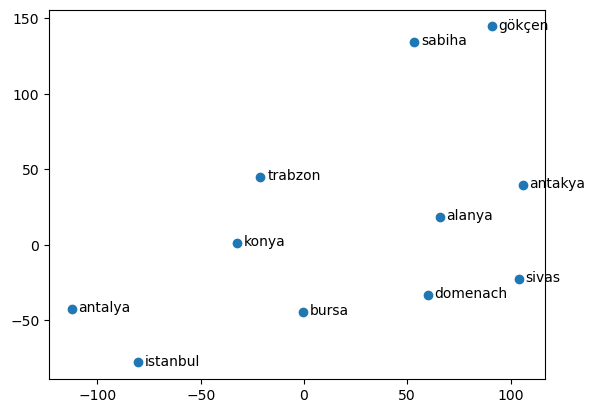

In [53]:
closestwords_tsneplot(model, 'istanbul')